<a href="https://colab.research.google.com/github/KrystaleahR/Linear-Algebra-Numerical-Methods/blob/main/Numerical_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x_data = np.array([[0], [1], [-1]])
y_data = np.array([[2], [3], [-2]])

X = np.hstack((x_data**0, x_data**1))
XT = X.T
print('X:\n', X, '\nXT:\n', XT)
XTX = XT @ X
XTy = XT @ y_data
print('XT @ X:\n', XTX, '\nXT @ y:\n', XTy)

a_solve = linalg.solve(XTX, XTy)
print('coefficients:\n', a_solve)

x = np.linspace(-1.5, 1.5, 10)
y = a_solve[0] + a_solve[1] * x

plt.scatter(x_data,y_data, label='Dataset', s=100, c='r')
plt.plot(x, y, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
a, resid, rank, singvals = np.linalg.lstsq(X, y_data, rcond=None)
print('regression coefficients a:\n', a) # Least-squares solution
print('resid:\n', resid) # Sums of squared residuals
print('rank X:\n', rank) # Rank of matrix X
print('singular values of X:\n', singvals) # Singular values of

Least Squares and Tikhonov


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg
from math import sqrt

X:
 [[ 1  1]
 [ 1  0]
 [ 1 -1]] 
XT:
 [[ 1  1  1]
 [ 1  0 -1]]
XT @ X:
 [[3 0]
 [0 2]] 
XT @ y:
 [[3]
 [4]]
coefficients:
 [[0.75      ]
 [1.33333333]]


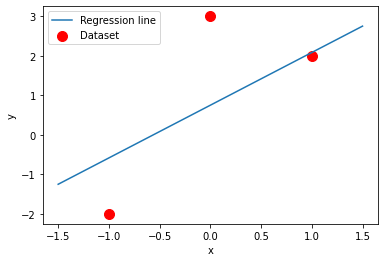

In [ ]:
x_data = np.array([[1], [0], [-1]])
y_data = np.array([[2], [3], [-2]])

X = np.hstack((x_data**0, x_data**1))
XT = X.T
print('X:\n', X, '\nXT:\n', XT)
XTX = XT @ X
XTy = XT @ y_data
print('XT @ X:\n', XTX, '\nXT @ y:\n', XTy)

alpha = 1
tikhonov_term = alpha * np.identity(2)

a_solve = linalg.solve(XTX + tikhonov_term, XTy)
print('coefficients:\n', a_solve)

x = np.linspace(-1.5, 1.5, 10)
y = a_solve[0] + a_solve[1] * x

#x_approx = np.linalg.lstsq(X, y_data, rcond=None)[0]
#print("l2 norm:")
#print(x_approx)

plt.scatter(x_data,y_data, label='Dataset', s=100, c='r')
plt.plot(x, y, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
from numpy import array
from numpy.linalg import norm
norm_l1 = norm(a_solve)
print(norm_l1)

1.5297966458904848


In [ ]:
from sklearn.linear_model import Ridge

import numpy as np

n_samples, n_features = 10, 5

rng = np.random.RandomState(0)

y = rng.randn(n_samples)

X = rng.randn(n_samples, n_features)

clf = Ridge(alpha=2.0)

clf.fit(X, y)

Ridge(alpha=2.0)

In [ ]:
A = np.array([[2,6], [-1,2]]) # one pivotin at the 1-st step
# A = np.array([[0, 1, -1], [1, 1, 2]]) # rectangular is possible
# A = np.array([[0, 0, 0], [0, 0, 0]]) # non full rank is also possible

P, L, U = linalg.lu(A)
print("P:\n", P)
print("L:\n", L)
print("U:\n", U)
print("LU:\n", L @ U)
PLU = P @ L @ U
print("PLU:\n", PLU)
print("PLU==A:\n", PLU==A)

LU = L @ U
print("LU:\n", LU)
PA = P @ A
print("PA:\n", PA)
print("LU==PA:\n", LU==PA)

P:
 [[1. 0.]
 [0. 1.]]
L:
 [[ 1.   0. ]
 [-0.5  1. ]]
U:
 [[2. 6.]
 [0. 5.]]
LU:
 [[ 2.  6.]
 [-1.  2.]]
PLU:
 [[ 2.  6.]
 [-1.  2.]]
PLU==A:
 [[ True  True]
 [ True  True]]
LU:
 [[ 2.  6.]
 [-1.  2.]]
PA:
 [[ 2.  6.]
 [-1.  2.]]
LU==PA:
 [[ True  True]
 [ True  True]]


In [ ]:
# Importing Libraries
import numpy as np
from scipy import linalg
# Gaussian elimination function
def GE_function(A, b) :

  # Number of unknowns
  n = A.shape[1]

  # Making numpy array of n size and initializing 
  # to zero for storing solution vector
  x = np.zeros((n,1))

  # Augmented matrix (a | b) and setting type to float
  a = np.concatenate((A, b), axis = 1).astype(float)

  # Applying Gauss Elimination
  for i in range(n):
      # Checking if pivot is zero
      if a[i][i] == 0.0:
          # sys.exit('Divide by zero detected!')
          # print('Divide by zero detected!')
          raise ZeroDivisionError("Zero on the diagonal")

      # Forward substitution
      for j in range(i+1, n):
          ratio = a[j][i]/a[i][i] 

          for k in range(n+1):
              a[j][k] = a[j][k] - ratio * a[i][k]

  # Backward Substitution
  x[n-1][0] = a[n-1][n]/a[n-1][n-1]

  for i in range(n-2,-1,-1):
      x[i][0] = a[i][n]
    
      for j in range(i+1,n):
          x[i][0] = x[i][0] - a[i][j]*x[j]
    
      x[i][0] = x[i][0]/a[i][i]
  return(x)

In [ ]:
# Displaying solution
def DisplaySol(x) :
    i = 1;
    print('\nRequired solution is: ')
    for xi in x :
      print('X%d = %0.2f' %(i,xi), end = '\t')
      i += 1
# Checking whether the solution is correct
def CheckSol(A, b, x) :
    Ax = A @ x
    print('\nAx=b: ', np.allclose(Ax, b))

In [ ]:
# system which solves correctly by Gaussian elimination without pivoting
A = np.array([
[2, 6], 
[-1, 2],
])
b = np.array([[4], [3]])

x = GE_function(A, b)
DisplaySol(x)
CheckSol(A, b, x)


Required solution is: 
X1 = -1.00	X2 = 1.00	
Ax=b:  True


Cholesky

In [ ]:
import pprint
import numpy as np
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

In [ ]:
A = np.array([[9, 3], [3, 17]])

In [ ]:
v,_ = np.linalg.eig(A)
v

array([ 8., 18.])

In [ ]:
np.linalg.cholesky(A)

array([[3., 0.],
       [1., 4.]])

In [ ]:
L = scipy.linalg.cholesky(A, lower=True)
L

array([[3., 0.],
       [1., 4.]])

In [ ]:
U = scipy.linalg.cholesky(A, lower=False)
U

array([[3., 1.],
       [0., 4.]])

In [ ]:
C = np.dot(L,np.transpose(L))
print(C)

[[ 9.  3.]
 [ 3. 17.]]


In [ ]:
M = np.array([[4, 0], [2, 9]])
N = np.transpose(M)

In [ ]:
H = np.dot(M,N)
print(H)

[[16  8]
 [ 8 85]]


Factorization into formula

In [ ]:
from sympy import * 

In [ ]:
import sympy
from sympy.matrices import Transpose

x1 = sympy.symbols("x1")
x2 = sympy.symbols("x2")


A = sympy.Matrix(L)
X = sympy.Matrix([[x1], [x2]])
f = Transpose(X)*A*X
sf = sympy.simplify(f)

print(f)
print(sf)

Matrix([[x1*(2.0*x1 + 1.0*x2) + 3.0*x2**2]])
Matrix([[x1*(2.0*x1 + 1.0*x2) + 3.0*x2**2]])


Norm

1. Compute the norm of A

In [ ]:
A = np.array([[1, 2], [-3, 4]])
#A = np.array([1,2])
np.linalg.norm(A, ord=1)
# np.inf for infinity

6.0

2. Find a determinant of A = a11a22 - a12a21

In [ ]:
np.linalg.det(A)

10.000000000000002

3. Find an inverse A^{-1}

In [ ]:
np.linalg.inv(A)

array([[ 0.4, -0.2],
       [ 0.3,  0.1]])

4. Find a norm of the inverse

In [ ]:
np.linalg.norm(np.linalg.inv(A), ord=1)

0.7000000000000001

5. Find the relative condition number

In [ ]:
np.linalg.cond(A, p=1)

4.2

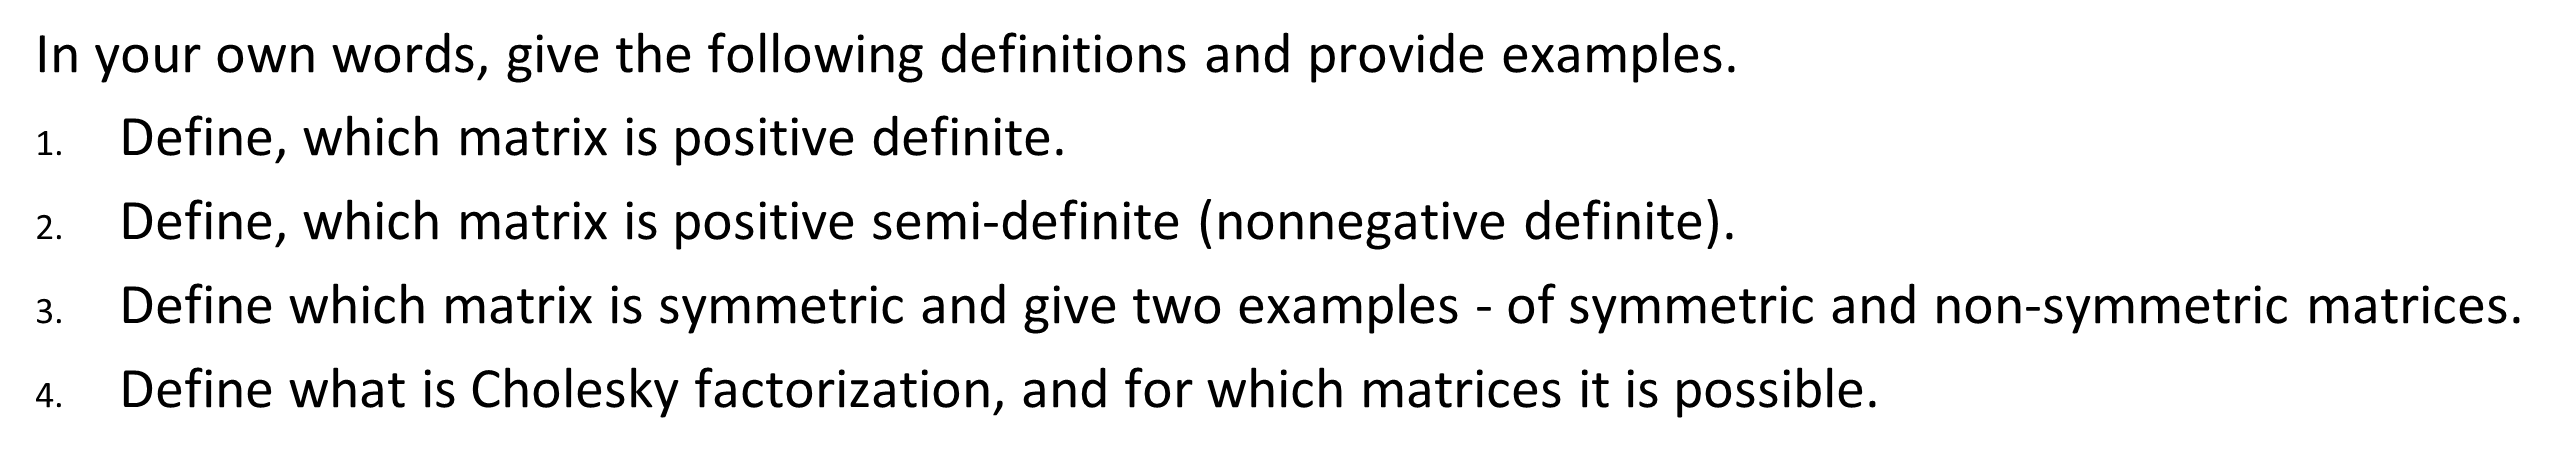

1. xTBx > 0 when x!= 0
2. xTBx>=0
3. 
[3 1]
[1 4]
4. 

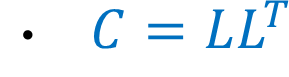

Possible only for symmetric positive-definite matrices

In [ ]:
from scipy.linalg import cholesky

A = [[2, 1], [1, 2]]

U = cholesky(A)

In [ ]:
U.T @ U

array([[2., 1.],
       [1., 2.]])

In [ ]:
np.dot(U.T, U)

array([[2., 1.],
       [1., 2.]])

In [ ]:
np.dot(U, U.T)

array([[2.5      , 0.8660254],
       [0.8660254, 1.5      ]])

In [ ]:
import numpy as np

mat = np.array([[ 1, 2, 3],

               [6, 5, 4]])

mat_norm = np.linalg.norm(mat, axis = 1)

len(mat_norm)

2

In [ ]:
import numpy as np

vector = np.arange(9)

matrix = vector.reshape((3, 3))

vec_norm = np.linalg.norm(vector)

mat_norm = np.linalg.norm(matrix)

vec_norm==mat_norm

True

Orthogonality

Motivation for orthogonality:
Condition grows under multiplication. Particularly, in AtA of normal equation.

Initialize different matrixes

In [ ]:
import sympy
from sympy import init_printing, N
from sympy.matrices import Matrix
import numpy as np
from scipy.linalg import orth, qr

init_printing()

In [ ]:
#A = np.array([[0, 1], [1, 0]]); symA = Matrix(A)  
A = np.array([[1,1,1], [0,1,1],[0,0,1]]); symA = Matrix(A)  
A

array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])

In [ ]:
symA

⎡1  1  1⎤
⎢       ⎥
⎢0  1  1⎥
⎢       ⎥
⎣0  0  1⎦

1. What is dimension of col(A)?

In [ ]:
np.linalg.matrix_rank(A)

3

In [ ]:
symA.rank()

In [ ]:
symA.columnspace()

⎡⎡1⎤  ⎡1⎤  ⎡1⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥, ⎢1⎥, ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣0⎦  ⎣0⎦  ⎣1⎦⎦

2. is A orthogonal?

In [ ]:
A.T @ A

array([[10, 14],
       [14, 20]])

In [ ]:
np.eye(A.shape[1])

array([[1., 0.],
       [0., 1.]])

In [ ]:
np.allclose(A.T @ A, np.eye(A.shape[1]))

False

3. compute its l1 norm

In [ ]:
np.linalg.norm(A, ord=1)

In [ ]:
np.linalg.norm(A, ord=2)

In [ ]:
symA.norm(ord=2)

ValueError: ignored

In [ ]:
N(symA.norm(ord=2))

In [ ]:
from math import sqrt
sqrt(sqrt(221) + 15)

In [ ]:
np.linalg.norm(A) # Frobenius

In [ ]:
symA.norm()

In [ ]:
import math
from math import sqrt
sqrt(30)

In [ ]:
np.linalg.norm(A, ord=np.inf)

In [ ]:
# symA.norm(ord=1)
# symA.norm(1) # fails

4. compute Ainv

In [ ]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
symA.inv()

⎡-2    1  ⎤
⎢         ⎥
⎣3/2  -1/2⎦

5. compute At

In [ ]:
A.T

array([[1, 3],
       [2, 4]])

In [ ]:
A.transpose()

array([[1, 3],
       [2, 4]])

In [ ]:
symA.T

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

In [ ]:
symA.transpose()

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

6. compare Ainv to At

In [ ]:
np.allclose(A.T, np.linalg.inv(A))

False

In [ ]:
np.isclose(A.T, np.linalg.inv(A))

array([[False, False],
       [False, False]])

In [ ]:
A.T - np.linalg.inv(A)

array([[3. , 2. ],
       [0.5, 4.5]])

7. compute l1 norm of Ainv and A

In [ ]:
normAinv = np.linalg.norm(np.linalg.inv(A), ord=1)
normAinv

In [ ]:
normA = np.linalg.norm(A, ord=1)
normA

In [ ]:
normAinv * normA

8. compute its condition number

In [ ]:
np.linalg.cond(A, p=1)

9. compute AtA

In [ ]:
A.T @ A

array([[10, 14],
       [14, 20]])

check A for orthogonality by comparing AtA to an identity matrix

In [ ]:
np.allclose(A.T @ A, np.identity(A.shape[1]))

False

10. compute its l1 norm

In [ ]:
np.linalg.norm(A.T @ A, ord=1)

11. compute its inverse AtAinv

In [ ]:
np.linalg.inv(A.T @ A)

array([[ 5. , -3.5],
       [-3.5,  2.5]])

In [ ]:
np.allclose(np.linalg.inv(A.T @ A), np.identity(A.shape[1]))

False

12. compute l1 norm of AtAinv

In [ ]:
np.linalg.norm(np.linalg.inv(A.T @ A), ord=1)

13. compute condition number of AtA

In [ ]:
np.linalg.cond(A.T @ A, p=1)

Check it by multiplication

In [ ]:
np.linalg.norm(np.linalg.inv(A.T @ A), ord=1) * np.linalg.norm(A.T @ A, ord=1)

14. compare condition numbers of A and AtA

In [ ]:
np.linalg.cond(A, p=1), np.linalg.cond(A.T @ A, p=1)


In [ ]:
from sympy.matrices import Matrix, GramSchmidt

V = [Matrix([2,3]), Matrix([3,6])]


In [ ]:
Matrix.orthogonalize(*V, normalize=True)

⎡⎡2⋅√13⎤  ⎡-3⋅√13 ⎤⎤
⎢⎢─────⎥  ⎢───────⎥⎥
⎢⎢  13 ⎥  ⎢   13  ⎥⎥
⎢⎢     ⎥, ⎢       ⎥⎥
⎢⎢3⋅√13⎥  ⎢ 2⋅√13 ⎥⎥
⎢⎢─────⎥  ⎢ ───── ⎥⎥
⎣⎣  13 ⎦  ⎣   13  ⎦⎦

In [ ]:
Matrix.orthogonalize(*V)

⎡⎡2⎤  ⎡-9/13⎤⎤
⎢⎢ ⎥, ⎢     ⎥⎥
⎣⎣3⎦  ⎣6/13 ⎦⎦

In [ ]:
A = np.array([[0, 1], [1, 1], [1, 1], [2, 1]])

q, r = np.linalg.qr(A)

In [ ]:
r

array([[-2.44948974, -1.63299316],
       [ 0.        ,  1.15470054]])

In [ ]:
#A = np.array([[0, 1], [1, 0]]); symA = Matrix(A)  
A = np.array([[1,1,1], [0,1,1],[0,0,1]]); symA = Matrix(A)  
A

array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])

In [ ]:
v1 = np.array([1,1,1])

In [ ]:
np.linalg.norm(v1)

In [ ]:
a1_hat = v1/np.linalg.norm(v1)
a1_hat

array([0.57735027, 0.57735027, 0.57735027])

In [ ]:
v2 = np.array([0,1,1])

In [ ]:
proj = v2.dot(a1_hat) * (a1_hat)
proj

array([0.66666667, 0.66666667, 0.66666667])

In [ ]:
a2 = v2 - proj
a2

array([-0.66666667,  0.33333333,  0.33333333])

In [ ]:
np.linalg.norm(a2)

In [ ]:
a2_hat = a2/np.linalg.norm(a2)
a2_hat

array([-0.81649658,  0.40824829,  0.40824829])

In [ ]:
v3 = np.array([0,0,1])

In [ ]:
proj_v3_a1 = v3.dot(a1_hat) * (a1_hat)
proj_v3_a1

array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
proj_v3_a2 = v3.dot(a2_hat) * (a2_hat)
proj_v3_a2

array([-0.33333333,  0.16666667,  0.16666667])

In [ ]:
a3 = v3 - proj_v3_a2 - proj_v3_a1
a3

array([-1.66533454e-16, -5.00000000e-01,  5.00000000e-01])

In [ ]:
np.linalg.norm(a3)

In [ ]:
from sympy.matrices import GramSchmidt

In [ ]:
M = Matrix(A)
M

⎡1  1  1⎤
⎢       ⎥
⎢0  1  1⎥
⎢       ⎥
⎣0  0  1⎦

In [ ]:
Q, R = M.QRdecomposition()
Q, R

⎛⎡1  0  0⎤  ⎡1  1  1⎤⎞
⎜⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  1  0⎥, ⎢0  1  1⎥⎟
⎜⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0  1⎦⎠

In [ ]:
Q, R = np.linalg.qr(M)
Q, R

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), array([[1., 1., 1.],
        [0., 1., 1.],
        [0., 0., 1.]]))

In [ ]:
import numpy as np

from sympy.matrices import Matrix

data = np.array([

    [1, 1, 1], 

    [0, 1, 1], 

    [0, 0, 1]

])

V = Matrix(data)

Q, R = V.QRdecomposition()

V, Q, R

⎛⎡1  1  1⎤  ⎡1  0  0⎤  ⎡1  1  1⎤⎞
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  1  1⎥, ⎢0  1  0⎥, ⎢0  1  1⎥⎟
⎜⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0  1⎦  ⎣0  0  1⎦⎠

Householder

In [ ]:
from scipy.linalg import orth
from sympy.matrices import Matrix
import sympy
import numpy as np
from sympy import init_printing
init_printing()

In [ ]:
x = np.array([[3],
             [-6]])
v = np.array([[3],
             [4]])
y = x - 2*np.dot((np.dot(x, v) / np.dot(v,v)),v)
y


ValueError: ignored

In [ ]:
a = np.array([[3.5],
             [0.5]])
b = np.array([[0.5],
             [-3.5]])
an = np.linalg.norm(a)
bn = np.linalg.norm(b)
an

In [ ]:
bn = np.linalg.norm(b)
bn

In [ ]:
v = a-b
v

array([[3.],
       [4.]])

In [ ]:
x = np.array([[3],
             [-6]])
v = np.array([[3],
             [4]])

I = np.identity(2)

vt = np.transpose(v)

print(v)
print(vt)
print(I)


[[3]
 [4]]
[[3 4]]
[[1. 0.]
 [0. 1.]]


In [ ]:
Hv = I - 2 * (v @ vt) / (vt @ v)
Hv

array([[ 0.28, -0.96],
       [-0.96, -0.28]])

In [ ]:
X = np.array([[3],
              [4]])

Y = Hv @ x
Y

array([-3.,  4.])

In [ ]:
np.transpose(Hv)


array([[-1.,  0.],
       [ 0.,  1.]])

In [ ]:
np.linalg.inv(Hv)

array([[-1., -0.],
       [ 0.,  1.]])

Gives Identity

In [ ]:
Hv**2

array([[1., 0.],
       [0., 1.]])

I

In [ ]:
np.transpose(Hv).dot(Hv)

array([[1., 0.],
       [0., 1.]])

In [ ]:
Hv**100

array([[1., 0.],
       [0., 1.]])

Hv Transpose

In [ ]:
Hv**101

array([[-1.,  0.],
       [ 0.,  1.]])

In [ ]:
A= [[4,5],[3,-1]]
a1 = np.transpose(A)[0]
a1 = np.array([[4],[3]])
a1

array([[4],
       [3]])

In [ ]:
n = np.linalg.norm(a1,2)
n

In [ ]:
I = np.eye(len(A))
e = np.array([[1],[0]])
e

array([[1],
       [0]])

In [ ]:
v = a1-n*e
v

array([[-1.],
       [ 3.]])

In [ ]:
vt = np.transpose(v)
vt

array([[-1.,  3.]])

In [ ]:
H = I - 2 * (v@vt)/(vt@v)
H

array([[ 0.8,  0.6],
       [ 0.6, -0.8]])

In [ ]:
(H @ A).round(2)

array([[ 5. ,  3.4],
       [-0. ,  3.8]])

In [ ]:
R = H@H@A
R*5

array([[20., 25.],
       [15., -5.]])

In [ ]:
len(a1)*e


array([[2],
       [0]])

In [ ]:
ap = np.array([[1],[-4],[3]])
zap = np.array([[-4,3],[3,7]])
n2 = np.linalg.norm(ap,2)
n2

In [ ]:
zap

array([[-4,  3],
       [ 3,  7]])

In [ ]:
e2 = np.array([[0],[1],[0]])
e2

array([[0],
       [1],
       [0]])

In [ ]:
v2 = ap - n2*e2
v2

array([[ 1.        ],
       [-9.09901951],
       [ 3.        ]])

In [ ]:
v2t = np.transpose(v2)
H2 = I - 2 * (v2@v2t)/(v2t@v2)
H2

array([[ 0.97844645,  0.19611614, -0.06466064],
       [ 0.19611614, -0.78446454,  0.58834841],
       [-0.06466064,  0.58834841,  0.80601809]])

In [ ]:
R = H2@H2@A
R

array([[ 1.00000000e+00,  5.00000000e+00,  4.00000000e+00],
       [-2.00000000e+00,  2.56019468e-17,  3.00000000e+00],
       [ 2.00000000e+00, -1.00000000e+00,  7.00000000e+00]])

In [ ]:
Q = H1@H2
Q

array([[-1.24135745,  0.19611614, -2.72407235],
       [-2.02368777, -0.78446454, -2.0710633 ],
       [-2.28446454,  0.58834841, -1.85339362]])

In [ ]:
Q.T@Q

array([[ 1.08550587e+01, -1.23102142e-15,  1.18067450e+01],
       [-1.23102142e-15,  1.00000000e+00, -1.21133905e-15],
       [ 1.18067450e+01, -1.21133905e-15,  1.51449413e+01]])

In [ ]:
np.allclose(A, np.dot(Q, R))

False

In [ ]:
import numpy as np

A = np.array([[0, 1], [1, 1], [1, 1], [2, 1]])

q, r = np.linalg.qr(A, mode="complete")
r

array([[-2.44948974, -1.63299316],
       [ 0.        ,  1.15470054],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
from sympy import Matrix

A = [[0, 1], [1, 1], [1, 1], [2, 1]]

symA = Matrix(A)

q, r = symA.QRdecomposition()
r

⎡    2⋅√6⎤
⎢√6  ────⎥
⎢     3  ⎥
⎢        ⎥
⎢    2⋅√3⎥
⎢0   ────⎥
⎣     3  ⎦

In [ ]:
import numpy as np

import scipy

A = np.array([[0, 1], [1, 1], [1, 1], [2, 1]])
q, r = np.linalg.qr(A)


r

array([[-2.44948974, -1.63299316],
       [ 0.        ,  1.15470054]])

Eigenvalues & Eigenvectors

Q3

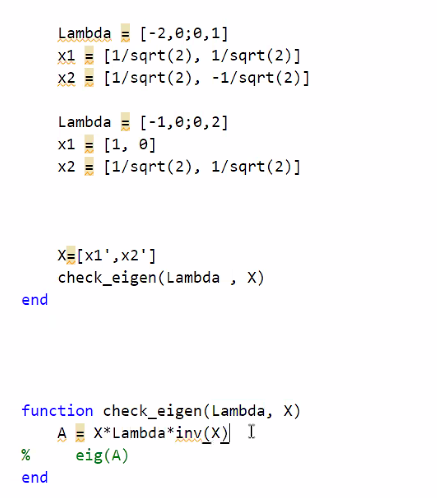

In [ ]:
import numpy as np
import sympy
L = np.array([[1,0],
              [0,2]])
S = np.array([[3/5,4/5],
             [(1/sqrt(2)),-(1/sqrt(2))]])

A = S @ L @ S.T
A



array([[ 1.64      , -0.70710678],
       [-0.70710678,  1.5       ]])

In [ ]:
from numpy import linalg as LA
w, v = LA.eigh(A)
w
v

array([[-0.67137418, -0.74111855],
       [-0.74111855,  0.67137418]])

Q4

In [ ]:
import numpy as np
L = np.array([[-1,0],
              [0,2]])
S = np.array([[1,1/sqrt(2)],
             [0,1/sqrt(2)]])

A = S @ L @ S.T
A

array([[-1.77302319e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00]])

In [ ]:
from numpy import linalg as LA
B = np.array([[1,5],
              [5,1]])
w, v = LA.eig(B)
w


array([ 6., -4.])

Q1

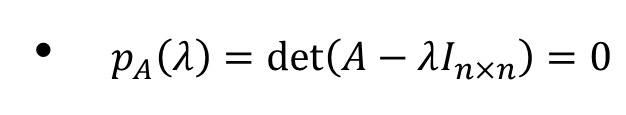

In [ ]:
A = np.array([[7,4],
              [-8,-5]])
w, v = LA.eig(A)
w

array([ 3., -1.])

In [ ]:
I = np.eye(2)

p1 = np.linalg.det(A - w[0] * I)
p1

In [ ]:
p2 = np.linalg.det(A - w[1] * I)
p2

In [ ]:
from sympy import Matrix
from sympy.abc import x, y

Mnp = np.array([[-6,3], [4,5]])
M = Matrix(Mnp)
M.charpoly()

In [ ]:
coefs = np.poly(Mnp)

In [ ]:
import numpy.polynomial.polynomial as poly
poly.polyroots(coefs[::-1])

array([-7.,  6.])

In [ ]:
A = np.array([[-6,3], [4,5]])
L = np.array([[-7,0], [0,6]])
A - L

array([[ 1,  3],
       [ 4, -1]])

In [ ]:
A = np.array([[-6,3], [4,5]])
v = np.array([[-3], [1]])

for i in range(3):
  p = A @ v
  print(p)
  max = np.amax(abs(p))
  print ("Largest is ")
  print(max)
  v = p/max
  

[[21]
 [-7]]
Largest is 
21
[[-7.        ]
 [ 2.33333333]]
Largest is 
7.0
[[ 7.        ]
 [-2.33333333]]
Largest is 
7.0


In [ ]:
import numpy as np

a = np.array([[3, 1], [2, 2]])

w, v = np.linalg.eig(a)

print(w)

[4. 1.]


In [ ]:
import numpy as np

a = np.array([[3, 1], [2, 2]])

w, v = np.linalg.eig(a)

np.isclose(np.dot(a, v), w*v)

array([[ True,  True],
       [ True,  True]])

In [ ]:
from numpy import array

from numpy.linalg import eig

A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

values, vectors = eig(A)

vec1 = vectors[:, 0]

mult = A @ vec1

div = mult / vec1

values

array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])

In [ ]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

values, vectors = np.linalg.eig(A)

P = vectors

Pinv = np.linalg.inv(P)

D = np.diag(values)

In [ ]:
new_A = P @ D @ Pinv
new_A

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

Exam Practise 1

In [ ]:
from sympy import Matrix
M = Matrix([[2, 1], [1, 2]])
M.charpoly()

PurePoly(lambda**2 - 4*lambda + 3, lambda, domain='ZZ')

In [ ]:
import numpy as np

a = np.array([[2, 1], [1, 2]])

w, v = np.linalg.eig(a)
w

array([3., 1.])

In [ ]:
A = np.array([[2, 1], [1, 2]])
v = np.array([[0], [-1]])

for i in range(2):
  p = A @ v
  print(p)
  max = np.amax(abs(p))
  print ("Largest is ")
  print(max)
  v = p/max

[[-1]
 [-2]]
Largest is 
2
[[-2. ]
 [-2.5]]
Largest is 
2.5


In [ ]:
v3 = np.array([[-4], [-5]])

In [ ]:
l1 = (v3.T @ A @ v3)/ (v3.T @ v3)
l1

array([[2.97560976]])

In [ ]:
# Python code to check
# whether a matrix is
# orthogonal or not
 
def isOrthogonal(a, m, n) :
    if (m != n) :
        return False
     
    # Multiply A*A^t
    for i in range(0, n) :
        for j in range(0, n) :
            sum = 0
            for k in range(0, n) :
         
                # Since we are multiplying
                # with transpose of itself.
                # We use a[j][k] instead
                # of a[k][j]
                sum = sum + (a[i][k] *
                             a[j][k])
         
        if (i == j and sum != 1) :
            return False
        if (i != j and sum != 0) :
            return False
 
    return True
 
# Driver Code
a = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]
if (isOrthogonal(a, 3, 3)) :
    print ("Yes")
else :
    print ("No")


Yes


NameError: ignored

In [ ]:
u = np.array([[-5], [4]])
#v3.T @ u

In [ ]:
def power_iteration(A, x_k, num_iterations: int):
    x_k_norm = np.linalg.norm(x_k)
    x_k = x_k / x_k_norm

    for iteration in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        
        x_k1 = np.dot(A, x_k)
        
        # calculate the norm
        x_k1_norm = np.linalg.norm(x_k1)

        # re normalize the vector
        x_k = x_k1 / x_k1_norm

        #print("iteration: ", iteration, ", x_k = ", x_k)
        #print("l2 norm of Ax_k: ", x_k1_norm)
        numerator = x_k.T @ A @ x_k
        denominator = x_k.T @ x_k
        lambda_k = numerator / denominator
        #print("lambda_k = ", lambda_k)
        #print()
    return lambda_k, x_k

In [ ]:
def deflation(AP):
  n = AP.shape[1]
  Eigvals = []
  Eigvecs = [[]*1]*n
  # Here draw a result on each deflationStage
  for deflationStage in range(n):
    v = (np.random.rand(n) - 1/2)*10 # generate random vector
    # Draw this vector: eigvect
    # Think, how to show eigval
    eigval, eigvect = power_iteration(AP, v, 10) # run power iteration to reveal eigenvalue lambda_k and eigenvecor x_k
    eigvect = eigvect.reshape((n,1))
    Eigvals.append(eigval)
    Eigvecs = np.hstack((Eigvecs, eigvect))
    #print(f"eigval= {eigval}\n eigvect={eigvect}\n")
    AP = AP @ (np.eye(n) - eigvect @ eigvect.T) # update A
  return Eigvals, Eigvecs

In [ ]:
eigenvalues, eigenvectors = deflation(A)
eigenvalues

[2.9999999999921876, -0.9999999999921872]

In [ ]:
v = np.array([2.5, 2])

In [ ]:
u = eigenvalues[1]

In [ ]:
u = u.T

In [ ]:
from numpy.linalg import inv
lambda2 = (u.T @ A @ u)/(u.T @ u)

lambda2

array([[1.02439024]])

Deflation Orthogonal Projection

In [ ]:
A = np.array([[3,7], [7,3]])

In [ ]:
def power_iteration(M):
    x_k = (np.random.rand(M.shape[1]) - 1/2)*10
    x_k_norm = np.linalg.norm(x_k)
    x_k = x_k / x_k_norm
    for iteration in range(10):
        x_k1 = np.dot(M, x_k)
        x_k1_norm = np.linalg.norm(x_k1)
        x_k = x_k1 / x_k1_norm
        lambda_k = x_k.T @ M @ x_k
        # There is no denominator because our vectors are of unit length. 
    return lambda_k, x_k

In [ ]:
eigval1, eigvect1 = power_iteration(A)
eigval1, eigvect1

(9.999999999996874, array([0.70710645, 0.70710712]))

In [ ]:
from math import sqrt
1 / sqrt(2)

0.7071067811865475

In [ ]:
eigvect1 = eigvect1.reshape((2,1))

In [ ]:
P1 = eigvect1 @ eigvect1.T
P1

array([[0.49999953, 0.5       ],
       [0.5       , 0.50000047]])

In [ ]:
P1_ort = np.eye(2) - P1
P1_ort

array([[ 0.50000047, -0.5       ],
       [-0.5       ,  0.49999953]])

In [ ]:
A1 = A @ P1_ort
A1

array([[-1.99999858,  1.99999669],
       [ 2.00000331, -2.00000142]])

In [ ]:
power_iteration(A1)

(-3.9999999999968754, array([ 0.70710595, -0.70710762]))

In [ ]:
# round of the elements of A1
A1 = np.array([[-2, 2], [2, -2]])
power_iteration(A1)

(-4.000000000000001, array([-0.70710678,  0.70710678]))

Deflation by Householder Transformation

In [ ]:
A = np.array([[-10, -9], [12, 11]]) # true eigenvalues 2, -1
power_iteration(A)

(2.003186747585284, array([-0.59987859,  0.80009104]))

In [ ]:
# Round it up to make the values exact just in case
x = np.array([[-0.6], [0.8]])
# Householder defining vector
v = x - np.array([[1], [0]])
v

array([[-1.6],
       [ 0.8]])

In [ ]:
v @ v.T
(v.T @ v)

array([[3.2]])

In [ ]:
H = np.eye(2) - 2 * v @ v.T /(v.T @ v)
H

array([[-0.6,  0.8],
       [ 0.8,  0.6]])

In [ ]:
A1 = H @ A @ H
A1
# should be upper triangular
# But due to computation errors, h21 = -1.59872116e-16 =almost 0

array([[ 2.00000000e+00,  2.10000000e+01],
       [-1.59872116e-16, -1.00000000e+00]])

In [ ]:
power_iteration(A1)

(2.0035713201048453, array([-9.99999986e-01, -1.70066996e-04]))

In [ ]:
# y is an eigenvector of A1, corresponding to eigenvalue -1
# The computation is done by hand
# The algorithm's presentation in Solomon's texbook
# does not deal with vectors at all. 
# So this is my add-on. 
# On the first step, the eigenvector of Ai is relatively easy to compute
# becaue it is of the same length as the original. 
# The later ones will be shorter. 
y = np.array([[7], [-1]])
x2 =  H @ y
x2

array([[-5.],
       [ 5.]])

In [ ]:
A @ x2

array([[ 5.],
       [-5.]])

QR

In [ ]:
from sympy import Matrix
M = Matrix([[4, -1], [-3, 2]])
M.charpoly()

PurePoly(lambda**2 - 6*lambda + 5, lambda, domain='ZZ')

In [ ]:
A = np.array([[4, -1], [-3, 2]])
w, v = np.linalg.eig(M)
w

array([5., 1.])

In [ ]:
from sympy import *
x  = symbols('x')
solve([x**2-6*x+5],[x])

[(1,), (5,)]

In [ ]:
a = np.array([[4],[-3]])
a

array([[ 4],
       [-3]])

In [ ]:
from numpy import linalg as LA
l2 = LA.norm(a)
l2

5.0

In [ ]:
e1 = np.array([[1],[0]])
e1

array([[1],
       [0]])

In [ ]:
v = a - l2*e1
v

array([[-1.],
       [-3.]])

In [ ]:
vvt = v @ v.T

In [ ]:
vtv = v.T @ v

In [ ]:
Hv = np.eye(2) - 2*(vvt)/(vtv)
Hv

array([[ 0.8, -0.6],
       [-0.6, -0.8]])

In [ ]:
A = np.array([[3,1],[4,2]])

In [ ]:
R = Hv @ A
R

array([[ 5.00000000e+00, -2.00000000e+00],
       [ 2.22044605e-16, -1.00000000e+00]])

In [ ]:
Q = Hv.T
Q

array([[ 0.8, -0.6],
       [-0.6, -0.8]])

In [ ]:
A1 = R @ Q
A1

array([[ 5.2, -1.4],
       [ 0.6,  0.8]])

In [ ]:
import numpy as np
import scipy.linalg as linalg
def qr_iteration(A):
    for i in range(100):
        Q, R = linalg.qr(A)
        A = np.dot(R, Q)
    return np.diag(R), Q
A = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]]) 
a, b = linalg.eig(A)
c, d = qr_iteration(A)

SVD Computation

In [ ]:
import numpy as np

A = np.array([[0,2],[0,0],[1,0]])
U, S, VH = np.linalg.svd(A)

In [ ]:
U

array([[-1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0., -1.,  0.]])

In [ ]:
S

array([2., 1.])

In [ ]:
VH

array([[-0., -1.],
       [-1., -0.]])

In [ ]:
AtA = A.T @ A
AtA

array([[1, 0],
       [0, 4]])

In [ ]:
eigval, eigvect = np.linalg.eigh(AtA)
eigval, eigvect

(array([1., 4.]), array([[1., 0.],
        [0., 1.]]))

In [ ]:
AAt = A @ A.T 
AAt

array([[4, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [ ]:
eigval, eigvect = np.linalg.eigh(AAt)
eigval, eigvect

(array([0., 1., 4.]), array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]]))

In [ ]:
singular_values=np.sqrt(eigval)
singular_values

array([1., 2.])

In [ ]:
S = np.zeros((3,2))
S[0,0] = singular_values[1]
S[1,1] = singular_values[0]
S

array([[2., 0.],
       [0., 1.],
       [0., 0.]])

In [ ]:
v1 = eigvect[:,0].reshape(2,1)
v2 = eigvect[:,1].reshape(2,1)
v1, v2

(array([[1.],
        [0.]]), array([[0.],
        [1.]]))

In [ ]:
Vt = np.hstack((v2, v1)).T
Vt

array([[0., 1.],
       [1., 0.]])

In [ ]:
#u1 = A @ np.array([[-0.615], [-0.788]]) / 8.87
u1 = A @ v1 / singular_values[0]
u1

array([[0.],
       [0.],
       [1.]])

In [ ]:
#u2 = np.array([[1, 2], [2, 3], [5,6]]) @ np.array([[-0.788], [0.615]]) / 0.575
u2 = A @ v2 / singular_values[1]
u2

array([[1.],
       [0.],
       [0.]])

In [ ]:
u1.T @ u2

array([[0.]])

In [ ]:
Proj = np.eye(3) - u1 @ u1.T - u2 @ u2.T
Proj

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [ ]:
y = np.array([[1], [2], [3]])
y_projected = Proj @ y
u3 = y_projected / np.linalg.norm(y_projected)
u3

array([[0.],
       [1.],
       [0.]])

In [ ]:
u1.T @ u3

array([[0.]])

In [ ]:
U = np.hstack((u2, u1, u3))
U

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

SVD Applications

In [ ]:
A = np.array([[0,2],[0,0],[1,0]])

In [ ]:
ata = A.T @ A
ata

array([[1, 0],
       [0, 4]])

In [ ]:
from numpy.linalg import inv
inv(ata)

array([[1.  , 0.  ],
       [0.  , 0.25]])

In [ ]:
AtA = A.T @ A
AtA

array([[1, 0],
       [0, 4]])

In [ ]:
AtAinv = inv(AtA)
AtAinv

array([[1.  , 0.  ],
       [0.  , 0.25]])

In [ ]:
Apl = AtAinv @ A.T
Apl

array([[0. , 0. , 1. ],
       [0.5, 0. , 0. ]])

In [ ]:
U, S, VH = np.linalg.svd(A)
S

array([2., 1.])

In [ ]:
S = np.array([[2,0],[0,1],[0,0]])

Calculate S+

In [ ]:
Spl = inv(S.T @ S) @ S.T
Spl

array([[0.5, 0. , 0. ],
       [0. , 1. , 0. ]])

In [ ]:
Apl = VH @ Spl @ U.T
Apl

array([[0. , 0. , 1. ],
       [0.5, 0. , 0. ]])

In [ ]:
A @ Apl

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [ ]:
S = zeros(A.shape)
S[0][0] = s[0]
S

In [ ]:
Aapprox = U @ S @ VT
Aapprox

In [ ]:
# check that the columns of Aapprox are proportional, thus, linear dependent
Aapprox[:, 0] / Aapprox[:, 1]

In [ ]:
np.linalg.matrix_rank(A)

In [ ]:
np.linalg.matrix_rank(Aapprox)

In [ ]:
import numpy as np
from numpy.linalg import pinv, inv
from numpy.linalg import svd
A = np.array([

  [0, 2],
  [0, 0],
  [1, 0]])
U, s, VT = svd(A)

D = np.zeros(A.shape)
D[:A.shape[1], :A.shape[1]] = np.diag(s)
ApinvBySvd = VT.T.dot(D.T).dot(U.T)
Apinv = pinv(A)

np.allclose(ApinvBySvd, Apinv)

False

In [ ]:
A = np.array([
  [0, 2],
  [0, 0],
  [1, 0]])

In [ ]:
S = np.zeros(A.shape)
S[0][0] = s[0]
S

array([[2., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
A1 = U @ S @ VT
A1

array([[0., 2.],
       [0., 0.],
       [0., 0.]])

In [ ]:
E = A - A1
E

array([[0., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
from numpy import linalg as LA
LA.norm(E, 'fro')

1.0

In [ ]:
LA.norm(A)

2.23606797749979

In [ ]:
LA.cond(A)

2.0

In [ ]:
w, v = np.linalg.eig(A1)
w

LinAlgError: ignored

In [ ]:
import numpy as np

A = np.random.randint(-10, 10, size=(3, 2))

n, m = A.shape

f = 0

for i in np.arange(n):

  for j in np.arange(m):

    f = f + np.sum(np.power(np.abs(A[i, j]), 2))

np.sqrt(f)

16.06237840420901

PCA

In [ ]:
X = np.array([[-1,-4,-1,-2],[1,0,-1,4]])

In [ ]:
mean = np.mean(X, axis=1)
mean

array([-2.,  1.])

In [ ]:
mean = X.mean(axis=1).reshape([2, 1])

In [ ]:
X_centered = X - mean
X_centered

array([[ 1., -2.,  1.,  0.],
       [ 0., -1., -2.,  3.]])

In [ ]:
XXT = X_c @ X_c.T

In [ ]:
eigval, eigvect = np.linalg.eigh(XXT)
eigval, eigvect

(array([ 6., 14.]), array([[1., 0.],
        [0., 1.]]))

In [ ]:
U, s, VT = svd(X)
U

array([[-0.78820544,  0.61541221],
       [ 0.61541221,  0.78820544]])

In [ ]:
Z_by_svd = U.T @ X
Z_by_svd

array([[ 1.40361765,  3.15282175,  0.17279323,  4.03805971],
       [ 0.17279323, -2.46164884, -1.40361765,  1.92199733]])

In [ ]:
U_centered, s_centered, VT_centered = svd(X_centered)
U_centered

array([[0., 1.],
       [1., 0.]])

In [ ]:
Z_centered_by_svd = U_centered.T @ X_centered
Z_centered_by_svd

array([[ 0., -1., -2.,  3.],
       [ 1., -2.,  1.,  0.]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Z_by_pca_T = pca.fit_transform(X.T)
Z_by_pca = Z_by_pca_T.T
Z_by_pca

array([[ 4.3874759e-16, -1.0000000e+00, -2.0000000e+00,  3.0000000e+00],
       [-1.0000000e+00,  2.0000000e+00, -1.0000000e+00,  0.0000000e+00]])

In [ ]:
n = X.shape[0]

cov_matrix = np.dot(X_centered.T, X_centered) / n
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

ValueError: ignored

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([
              [-1, -4, -1, -2], 
              [1, 0, -1, 4], 
])
pca = PCA()
pca.fit(X.T)
print(pca.components_)

[[ 0.  1.]
 [-1. -0.]]


In [ ]:
Spl = inv(s_centered.T @ s_centered) @ s_centered.T
Spl

LinAlgError: ignored

In [ ]:
A2 = U_centered @ Spl @VT_centered

In [ ]:
Apl = VH @ Spl @ U.T
Apl

array([[0. , 0. , 1. ],
       [0.5, 0. , 0. ]])

In [ ]:
A @ Apl

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [ ]:
S = zeros(A.shape)
S[0][0] = s[0]
S

In [ ]:
Aapprox = U @ S @ VT
Aapprox

ValueError: ignored